In [0]:
!curl https://neo4j.com/artifact.php?name=neo4j-community-3.5.1-unix.tar.gz -o neo4j.tar.gz
!tar -xf neo4j.tar.gz
!mv neo4j-community-3.5.1 nj
!sed -i '/dbms.security.auth_enabled/s/^#//g' nj/conf/neo4j.conf
!nj/bin/neo4j start

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97.1M  100 97.1M    0     0  5918k      0  0:00:16  0:00:16 --:--:--   601
WARNING! You are using an unsupported Java runtime. 
* Please use Oracle(R) Java(TM) 8, OpenJDK(TM) or IBM J9 to run Neo4j.
* Please see https://neo4j.com/docs/ for Neo4j installation instructions.
Active database: graph.db
Directories in use:
  home:         /content/nj
  config:       /content/nj/conf
  logs:         /content/nj/logs
  plugins:      /content/nj/plugins
  import:       /content/nj/import
  data:         /content/nj/data
  certificates: /content/nj/certificates
  run:          /content/nj/run
Starting Neo4j.
Started neo4j (pid 194). It is available at http://localhost:7474/
There may be a short delay until the server is ready.
See /content/nj/logs/neo4j.log for current status.


In [0]:
!pip install py2neo -q
!pip install ipython-cypher
!pip install networkx

     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 184kB 28.3MB/s 
     |████████████████████████████████| 348kB 33.7MB/s 
     |████████████████████████████████| 849kB 33.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 81kB 15.2MB/s 
     |████████████████████████████████| 245kB 27.1MB/s 
  Created wheel for ipython-cypher: filename=ipython_cypher-0.2.6-cp36-none-any.whl size=13275 sha256=610b72ccf255b68b8edffc3d1a8eb3b8ee85f053e8a37b601f13ac40ce2ae59d
  Stored in directory: /root/.cache/pip/wheels/0e/1e/65/1e0128677b6e6483b90894965f43dd078966270d3dda930044
  Created wheel for 

In [0]:
from py2neo import Graph, Node, Relationship
import networkx as nx

In [0]:
%load_ext cypher
%matplotlib inline

In [0]:
graph = Graph()
a = Node("Person", name="Alice")
b = Node("Person", name="Bob")
graph.create(Relationship(a, "KNOWS", b))

2 rows affected.


{('0', '1'): Text(-1.5265566588595902e-16, 0.0, 'KNOWS')}

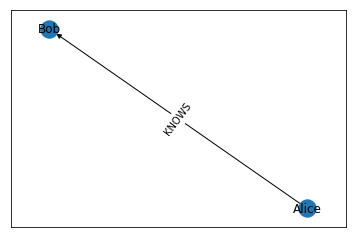

In [0]:
results = %cypher MATCH (s)-[p]-(o) RETURN s, p, o
g = results.get_graph()
nx.draw_networkx(g, labels=dict([(n[0], n[1]['name']) for n in g.nodes(data=True)]))
nx.draw_networkx_edge_labels(g, nx.spring_layout(g), edge_labels=dict([((n[0], n[1]), n[2]['type']) for n in g.edges(data=True)]))